# Create 100 points satisfying a third degree polynomial (e.g. y = 4.2x**3 -2.1x**2 + 3x -2 + random-noise)

In [ ]:
# the quadratic euation with hundred data points
#polynomial with the the 3rd degree and the noise.

import numpy as np
m = 100 # number of data points
x = 6 * np.random.rand(m,1) - 3
y = 4.2*(x**3) -2.1*(x**2) - 2 + 10*np.random.randn(m,1)

In [41]:
print(type(x), x.ndim, x.shape, type(y),y.ndim, y.shape)
print(x[:3])
print(y[:3])

<class 'numpy.ndarray'> 2 (100, 1) <class 'numpy.ndarray'> 2 (100, 1)
[[ 2.49390778]
 [-0.85696689]
 [-2.92404379]]
[[  52.77563753]
 [   6.30936609]
 [-137.51877037]]


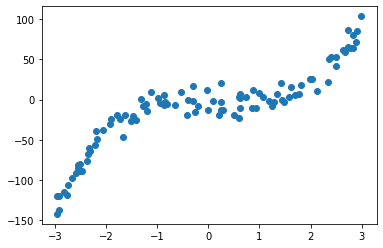

In [42]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

[-1.65608324] [[ 0.66347959  1.04165764  3.97772117 -0.22704738  0.45562339 -0.57793633
  -0.16566546  0.14058379  0.01376633 -0.00890711]]


In [44]:
#polynomial feature with the degree 10
from sklearn.preprocessing import PolynomialFeatures
num_degrees = 10
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])
print(x.shape, x_poly.shape)


[2.49390778] [2.49390778e+00 6.21957601e+00 1.55110490e+01 3.86831257e+01
 9.64721481e+01 2.40592641e+02 6.00015858e+02 1.49638421e+03
 3.73184423e+03 9.30687536e+03]
(100, 1) (100, 10)


# Create polynomial features of degrees 10 and build a linear regression model on 70% of the training data and test it on the remaining 30%.

[-3.29501809] [[-5.25322059  3.62751103  4.64015753 -4.0180686   0.50383509  1.38582356
  -0.1178985  -0.21237826  0.00754977  0.01117736]]
Mean Squared Error on Test:  161.59935953240685


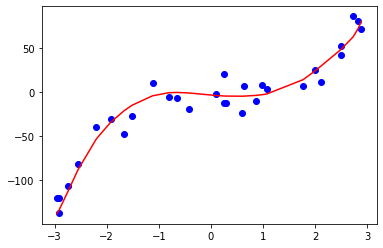

In [45]:
# Traning as 70% of the data and test data as 30% and builded a modek with the degree 10
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]
xs = x_test[:,:-(num_degrees-1)]

plt.plot(xs,ys,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

# Repeat the previous step above (you can keep the data the same), but this time also use regularization to build and test your model.

Mean Squared Error on Test:  152.74862595680284
[-2.75845279] [-0.00000000e+00  0.00000000e+00  2.00612675e+00  0.00000000e+00
  4.78434728e-01 -8.86774816e-02 -1.79467207e-02 -1.97635241e-03
 -5.76816544e-04  9.89525023e-04]


/Users/amulyageereddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1992.4854963139471, tolerance: 16.12772295617056
  model = cd_fast.enet_coordinate_descent(


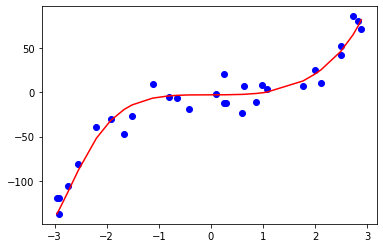

In [46]:
# Added the lasso variable to the same step that is used regularization to build the model and test it.

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mse = mean_squared_error(truey,y_predict)
print("Mean Squared Error on Test: ", mse)
print(lasso_reg.intercept_, lasso_reg.coef_)

plt.plot(xs,y_predict,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

# Inference : By Adding the lasso alpha i.e the regularization the value of the mean square error value decreased because by adding the lasso variable it eliminates the tetha completely. The regularized Lasso regression model has less Mean Squared Error compared to Polynomial regression and has better performance.